# What is YOLOv5?
YOLOv5 is a model in the You Only Look Once (YOLO) family of computer vision models. YOLOv5 is commonly used for detecting objects. YOLOv5 comes in four main versions: small (s), medium (m), large (l), and extra large (x), each offering progressively higher accuracy rates. Each variant also takes a different amount of time to train.

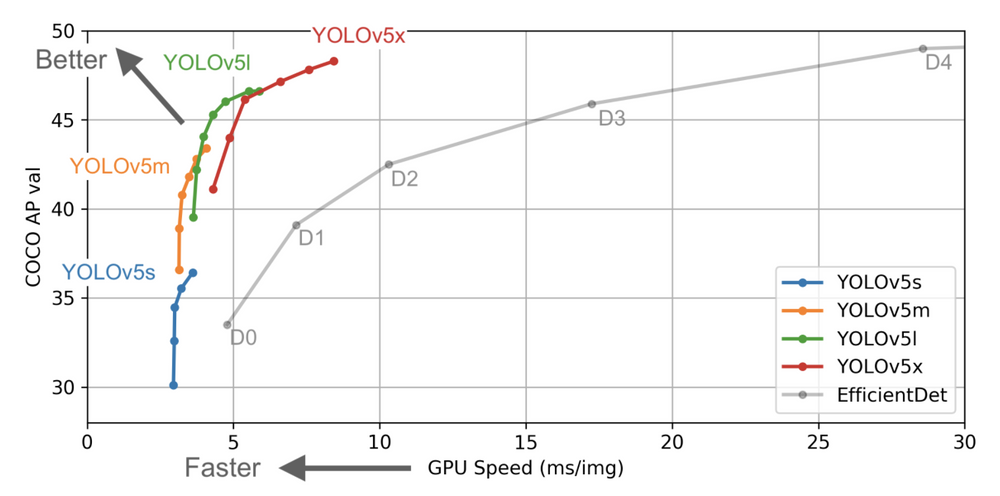

# **An Overview of the YOLOv5 Architecture**
Object detection, a use case for which YOLOv5 is designed, involves creating features from input images. These features are then fed through a prediction system to draw boxes around objects and predict their classes.

The YOLO model was the first object detector to connect the procedure of predicting bounding boxes with class labels in an end to end differentiable network.

The YOLO network consists of three main pieces.

Backbone: A convolutional neural network that aggregates and forms image features at different granularities.
Neck: A series of layers to mix and combine image features to pass them forward to prediction.
Head: Consumes features from the neck and takes box and class prediction steps.

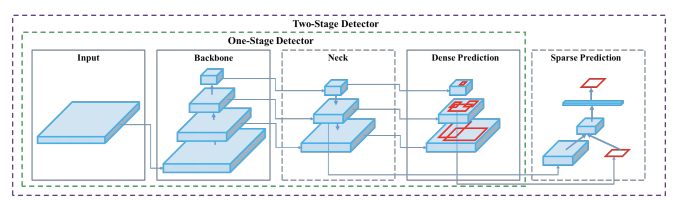

With that said, there are many approaches one can take to combining different architectures at each major component. The contributions of YOLOv4 and YOLOv5 are foremost to integrate breakthroughs in other areas of computer vision and prove that as a collection, they improve YOLO object detection.

# **An Overview of YOLO Training Procedures**
The procedures taken to train a model are just as important as any factor to the end performance of an object detection system, although they are often less discussed. Let's talk about two main training procedures in YOLOv5:

**Data Augmentation:** Data augmentation makes transformations to the base training data to expose the model to a wider range of semantic variation than the training set in isolation.

**Loss Calculations:** YOLO calculates a total loss function from the GIoU, obj, and class losses functions. These functions can be carefully constructed to maximize the objective of mean average precision.

## **Auto Learning Bounding Box Anchors**
In the YOLOv3 PyTorch repo, Glenn Jocher introduced the idea of learning anchor boxes based on the distribution of bounding boxes in the custom dataset with K-means and genetic learning algorithms. This is very important for custom tasks, because the distribution of bounding box sizes and locations may be dramatically different than the preset bounding box anchors in the COCO dataset.

In order to make box predictions, the YOLOv5 network predicts bounding boxes as deviations from a list of anchor box dimensions.

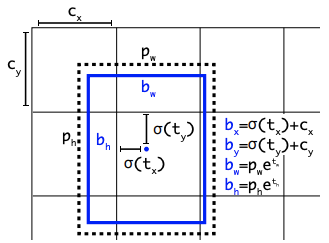

The most extreme difference in anchor boxes may occur if we are trying to detect something like giraffes that are very tall and skinny or manta rays that are very wide and flat. All YOLO anchor boxes are auto-learned in YOLOv5 when you input your custom data.

# **ABOUT DATASET**

[link text](https://app.roboflow.com/hari-narayanan/eye-disease-classification-4hotj/deploy/1)

## Setup
Pull in respective libraries to prepare the notebook environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-188-gd19439a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 classification to load into this notebook. Select the `Export` button at the top of the version page, `Folder Structure` type, and `show download code`.

The ensures all our directories are in the right format:

```
dataset
├── train
│   ├── class-one
│   │   ├── IMG_123.jpg
│   └── class-two
│       ├── IMG_456.jpg
├── valid
│   ├── class-one
│   │   ├── IMG_789.jpg
│   └── class-two
│       ├── IMG_101.jpg
├── test
│   ├── class-one
│   │   ├── IMG_121.jpg
│   └── class-two
│       ├── IMG_341.jpg
```
![](https://i.imgur.com/BF9BNR8.gif)


Copy and paste that snippet into the cell below.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VFQrSXI3PXI5ppUKRxg3")
project = rf.workspace("hari-narayanan").project("eye-disease-classification-4hotj")
dataset = project.version(1).download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=fc2630c615f4c5a88c526e0aadf68c996418695d1ca65a7773ad6d110d16bec2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to eye-disease-classification-1 in folder:: 100%|██████████| 1627/1627 [00:00<00:00, 4477.16it/s]


## Train On Custom Data 🎉
Here, we use the DATASET_NAME environment variable to pass our dataset to the --data parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

In [ ]:
%cd ../yolov5
!python classify/train.py --model yolov5x-cls.pt --data $DATASET_NAME --epochs 100 --img 128 --pretrained weights/yolov5x-cls.pt

/content/yolov5
classify/train: model=yolov5x-cls.pt, data=eye-disease-classification-1, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5x-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-188-gd19439a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always

## Validate Your Custom Model
Repeat step 2 from above to test and validate your custom model.

In [ ]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$DATASET_NAME

classify/val: data=../datasets/eye-disease-classification-1, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-188-gd19439a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 264 layers, 46800567 parameters, 0 gradients, 128.9 GFLOPs
testing: 100% 2/2 [00:01<00:00,  1.19it/s]
                   Class      Images    top1_acc    top5_acc
                     all         166       0.464       0.988
                Cataract          14       0.786           1
                Diabetic          27           0           1
                Glaucoma          30       0.567           1
            Hypertensive          14           0       0.929
                  Myopia          24       0.917       0.958
                  Normal          31       0.613           1
                  Others          26       0.308

# saving the model in drive

In [ ]:
!cp -r "/content/yolov5/runs/train-cls/exp" "/content/drive/MyDrive/eye_disease_classification/exp/yolo v5"